In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
shp_path = r'D:\codelearning\dataanalysis\HKhotel\香港特别行政区\香港特别行政区.shp'
hongkong_map = gpd.read_file(shp_path, encoding='utf-8')
data_path = r"D:\codelearning\dataanalysis\酒店数据.xlsx"
data = pd.read_excel(data_path)

In [14]:
#修整地区格式
data['地区'] = data['地区'].apply(lambda x: x + '区' if not x.endswith('区') else x)

In [18]:
#计算酒店数量
hotel_counts = data.groupby('地区').size().reset_index(name='hotel_count')

In [12]:
print(hongkong_map.columns)

Index(['adcode', 'name', 'center', 'centroid', 'childrenNu', 'level', 'parent',
       'subFeature', 'acroutes', 'geometry'],
      dtype='object')


In [32]:
hongkong_map = hongkong_map.to_crs(epsg=2326)

In [33]:
unique_districts = hongkong_map['name'].unique()
print(unique_districts)

['中西区' '湾仔区' '东区' '南区' '油尖旺区' '深水埗区' '九龙城区' '黄大仙区' '观塘区' '荃湾区' '屯门区' '元朗区'
 '北区' '大埔区' '西贡区' '沙田区' '葵青区' '离岛区']


In [34]:
merged_data = hongkong_map.merge(hotel_counts, left_on='name', right_on='地区', how='left')

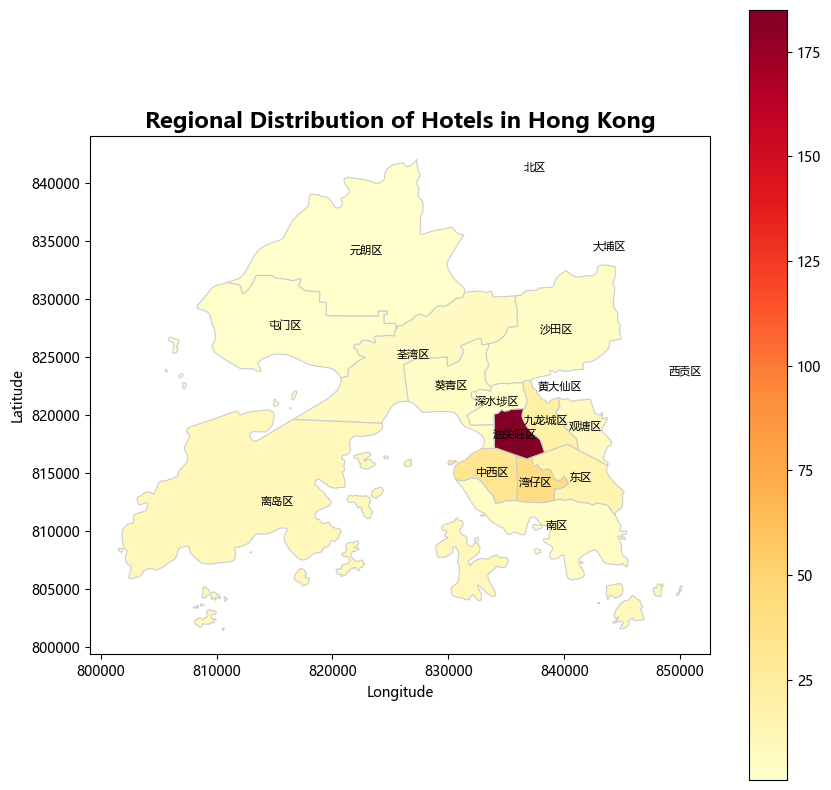

In [39]:
# 绘制地图
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='hotel_count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
#更换字体为微软雅黑
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

merged_data['centroid'] = merged_data['geometry'].centroid
for x, y, label in zip(merged_data['centroid'].x, merged_data['centroid'].y, merged_data['name']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')


ax.set_title('Regional Distribution of Hotels in Hong Kong', fontdict={'fontsize': '16', 'fontweight': 'bold'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig('map.png')